In [4]:
using FileIO
using Plots
using LinearAlgebra

#dataset = load("dat_spin1p5_nobound_sweep_run.jld2","dataset")
dataset = load("dat_spin1p5_0p3_max_sweep_run.jld2","dataset")

nruns = length(dataset)
min_J = zeros(nruns)
min_eig_full = zeros(nruns)
min_eig_reduc = zeros(nruns)
drop_idxs = zeros(nruns)

dropped_offdiag = zeros(nruns)
dropped_diag = zeros(nruns)
spectral_est = zeros(nruns)

for idx = 1:nruns
    dat = dataset[idx]
    min_J[idx] = dat["min_J"]
    min_eig_full[idx] = dat["min_eig_full"]
    nOps = length(dat["eigs_full"])

    min_eig_reduc[idx] = dat["min_eig_reduc"]
    corMat = broadcast(real,dat["corMat"])
    #display(dat["J_arr"])
    #display(corMat)
    drop_idx = dat["drop_idx"]
    drop_idxs[idx] = drop_idx
    keep_idx = setdiff(1:nOps,drop_idx)
    #display(drop_idx)
    #display(corMat[drop_idx,keep_idx])
    diag_drop_val = diag(corMat)[drop_idx]
    diag_kept_val = maximum(broadcast(abs,diag(corMat)[keep_idx]))
    offdiag_drop_val = maximum(broadcast(abs,corMat[drop_idx,keep_idx]))
    dropped_offdiag[idx] = offdiag_drop_val
    dropped_diag[idx] = diag_drop_val
    spectral_est[idx] = abs(offdiag_drop_val/(diag_drop_val))
end

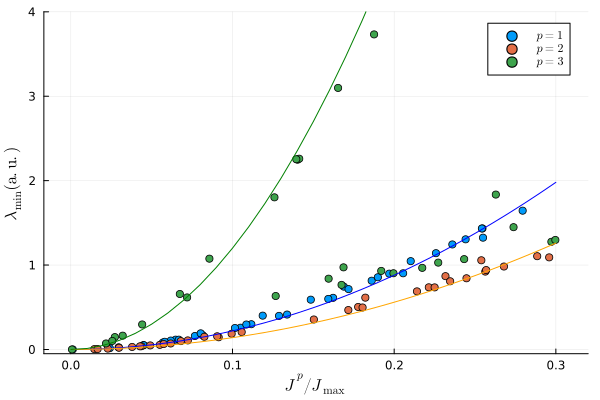

"/Users/lzawbrito/projects/HReconCorMat/SU2_pertubation_quadfit.pdf"

In [7]:
# minJ vs min eig
using LaTeXStrings
using DelimitedFiles

plot()
for tar_idx = 1:3
    plot_terms = (drop_idxs .== tar_idx)
    prefac = 100/tar_idx^2
    scatter!(min_J[plot_terms], prefac*min_eig_reduc[plot_terms],labels=string(L"p = %$tar_idx"))
    writedlm("./StephenData/su2_lambda_p=$tar_idx.txt", hcat(min_J[plot_terms], prefac * min_eig_reduc[plot_terms]))
end
fit_x = 0:0.01:0.3
plot!(fit_x,22*fit_x.^2,color=:blue,labels=false)
plot!(fit_x,14*fit_x.^2,color=:orange,labels=false)
plot!(fit_x,120*fit_x.^2,color=:green,xlim=(-0.05/3,0.32),ylim=(-0.05,4),labels=false)

xlabel!(L"J^p/J_\textrm{max}")
ylabel!(L"\lambda_\textrm{min} \textrm{(a.u.)}")
display(plot!())
savefig("SU2_pertubation_quadfit.pdf")

